In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import tqdm
import json
import copy

In [10]:
data_source_json = '../src/dataset/data_source_3d.json'
data_source=json.load(open(data_source_json))

In [11]:
#check all CMD files exists
data_cmd=data_source['CMD']
data_cmd_to_do=copy.deepcopy(data_cmd)
for suite_name,suite_data in data_cmd.items():
    #print(suite_name)
    for set_name,set_data in suite_data.items():
        #print(set_name)
        for z_name,z_data in set_data.items():
            #print(z_name)
            for field_name,file_path in z_data.items():
                #assert os.path.exists(file_path),file_path # still check if data exists
                if z_name!="z_0.0" or field_name not in ["Mcdm","Mstar","B","HI","MgFe","Mgas","P","T","Z","ne"]:
                    del data_cmd_to_do[suite_name][set_name][z_name][field_name]
                else:
                    assert os.path.exists(file_path),file_path # check if data exists
data_cmd_to_do

{'IllustrisTNG': {'CV': {'z_0.0': {'Mcdm': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mcdm_IllustrisTNG_CV_256_z=0.0.npy',
    'Mstar': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mstar_IllustrisTNG_CV_256_z=0.0.npy',
    'B': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_B_IllustrisTNG_CV_256_z=0.0.npy',
    'HI': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_HI_IllustrisTNG_CV_256_z=0.0.npy',
    'Mgas': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mgas_IllustrisTNG_CV_256_z=0.0.npy',
    'MgFe': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_MgFe_IllustrisTNG_CV_256_z=0.0.npy',
    'ne': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_ne_IllustrisTNG_CV_256_z=0.0.npy',
    'P': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_P_IllustrisTNG_CV_256_z=0.0.npy',
    'T': '/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_T_IllustrisTNG_CV_256_z=0.0.npy',
    'Z': '/n/holystor

In [13]:
#check all CMD files exists
print_mode=False
for suite_name,suite_data in data_cmd_to_do.items():
    #print(suite_name)
    for set_name,set_data in suite_data.items():
        #print(set_name)
        for z_name,z_data in set_data.items():
            #print(z_name)
            for field_name,file_path in z_data.items():
                print("From",file_path)
                dest_path = file_path.replace('/3D_grids_new/','/2df3d/')
                dest_path = dest_path.replace('/Grids_','/Maps_')
                dest_path = dest_path.replace('_z=0.0.npy','_z=0.00.npy')
                print("To:",dest_path)
                assert dest_path != file_path, "Path is the same,probably replace didn't work"
                if print_mode:
                    continue
                field=np.load(file_path,mmap_mode="r")
                fields_2d=[]
                for i_sim in tqdm.tqdm(range(len(field))):
                    for ax in range(0,3):
                        for i in range(5):
                            slc=[slice(None)]*(field.ndim-1)
                            slc[ax]=slice(i*50,(i+1)*50)
                            field_=field[i_sim][tuple(slc)].mean(ax)*25*(50/256)
                            fields_2d.append(field_)
                fields_2d=np.stack(fields_2d,axis=0)
                print("Done, shape:",fields_2d.shape)
                np.save(dest_path,fields_2d)
                print()

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mcdm_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Mcdm_IllustrisTNG_CV_256_z=0.00.npy


  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:03<00:00,  8.39it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mstar_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Mstar_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.50it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_B_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_B_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.61it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_HI_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_HI_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.40it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mgas_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Mgas_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.31it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_MgFe_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_MgFe_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.23it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_ne_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_ne_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.27it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_P_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_P_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.38it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_T_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_T_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.17it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Z_IllustrisTNG_CV_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Z_IllustrisTNG_CV_256_z=0.00.npy


100%|██████████| 27/27 [00:03<00:00,  8.41it/s]


Done, shape: (405, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mcdm_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Mcdm_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:55<00:00,  8.63it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mstar_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Mstar_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:55<00:00,  8.65it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_B_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_B_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_HI_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_HI_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:55<00:00,  8.63it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Mgas_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Mgas_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_MgFe_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_MgFe_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:54<00:00,  8.77it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_ne_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_ne_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_P_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_P_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [02:01<00:00,  8.23it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_T_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_T_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:55<00:00,  8.65it/s]


Done, shape: (15000, 256, 256)

From /n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_new/Grids_Z_IllustrisTNG_LH_256_z=0.0.npy
To: /n/holystore01/LABS/itc_lab/Lab/Camels/2df3d/Maps_Z_IllustrisTNG_LH_256_z=0.00.npy


100%|██████████| 1000/1000 [01:42<00:00,  9.73it/s]


Done, shape: (15000, 256, 256)



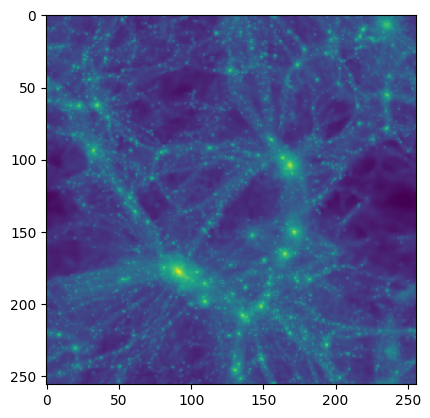

In [61]:
plt.imshow(np.log10(fields_2d[0]+1))

In [ ]:
#check all CMD files exists
print_mode=False
for suite_name,suite_data in data_cmd_to_do.items():
    #print(suite_name)
    for set_name,set_data in suite_data.items():
        #print(set_name)
        for z_name,z_data in set_data.items():
            #print(z_name)
            for field_name,file_path in z_data.items():
                print("From",file_path)
                dest_path = file_path.replace('/3D_grids_new/','/2df3d/')
                print("To:",dest_path)
                assert dest_path != file_path, "Path is the same,probably replace didn't work"
                if print_mode:
                    continue
                field=np.load(file_path,mmap_mode="r")
                fields_2d=[]
                for i_sim in tqdm.tqdm(range(len(field))):
                    for ax in range(0,3):
                        for i in range(5):
                            slc=[slice(None)]*(field.ndim-1)
                            slc[ax]=slice(i*50,(i+1)*50)
                            field_=field[i_sim][tuple(slc)].mean(ax)*25*(50/256)
                            fields_2d.append(field_)
                fields_2d=np.stack(fields_2d,axis=0)
                print("Done, shape:",fields_2d.shape)
                np.save(dest_path,fields_2d)
                print()

In [ ]:
"Mcdm","Mstar","B","HI","MgFe","Mgas","P","T","Z","ne"

In [14]:
params=np.loadtxt("/n/holylfs05/LABS/finkbeiner_lab/Users/cfpark00/globus_port/camels_23_06_22/CMD_3DGrid_1P_256/params_1P_IllustrisTNG.txt")
with h5py.File(h5fn,"r+") as h5:
    h5["params"]=params
params.shape

(61, 6)